In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lxmls.readers import galton

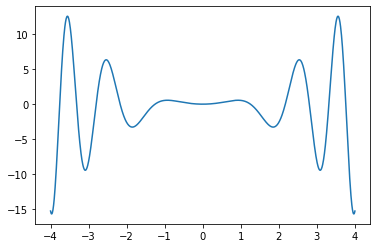

In [2]:
X = np.linspace(-4, 4, 1000)
plt.plot(X, X**2*np.cos(X**2))
plt.savefig("simple.pdf")

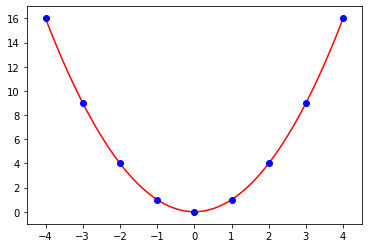

In [3]:
# Linspace will return 1000 points,
# evenly spaced between -4 and +4
X = np.linspace(-4, 4, 1000)
# Y[i] = X[i]**2
Y = X**2
# Plot using a red line ('r')
plt.plot(X, Y, 'r')
# arange returns integers ranging from -4 to +4
# (the upper argument is excluded!)
Ints = np.arange(-4,5)
# We plot these on top of the previous plot
# using blue circles (o means a little circle)
plt.plot(Ints, Ints**2, 'bo')
# You may notice that the plot is tight around the line
# Set the display limits to see better
plt.xlim(-4.5,4.5)
plt.ylim(-1,17)
plt.show()

In [4]:
A = np.array([
    [1,2,3],
    [2,3,4],
    [4,5,6]])
A[0,:] # This is [1,2,3]
A[0] # This is [1,2,3] as well
A[:,0] # this is [1,2,4]
A[1:,0] # This is [ 2, 4 ]. Why?
# Because it is the same as A[1:n,0] where n is the size of the array.

array([2, 4])

In [5]:
A = np.arange(100)
# These two lines do exactly the same thing
print(np.mean(A))
print(A.mean())
C = np.cos(A)
print(C.ptp())  # Peak to peak (maximum - minimum) value along a given axis

49.5
49.5
1.9999608263946371


In [6]:
# Exercise 0.7
x = np.arange(1000)/1000
y = x**2

np.sum(y/1000)

0.3328335

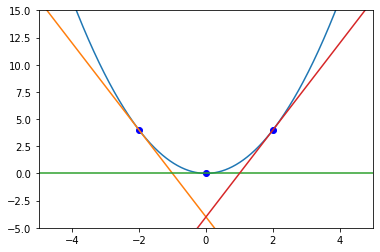

In [7]:
# Exercise 0.11
a = np.arange(-5,5,0.01)
f_x = np.power(a,2)
plt.plot(a,f_x)
plt.xlim(-5,5)
plt.ylim(-5,15)
k= np.array([-2,0,2])
plt.plot(k,k**2,"bo")
for i in k:
    plt.plot(a, (2*i)*a - (i**2))

# Exercise 0.13

In [8]:
galton_data = galton.load()
# Add a random noise to the data to get better scatter plots
galton_data_randn = galton_data + 0.5*np.random.randn(len(galton_data), 2)

In [9]:
X = np.expand_dims(galton_data[:, 0], 1)
y = galton_data[:, 1]

In [10]:
def get_error(X, y, w):
    return np.sum((X.T @ w - y)**2)

def get_grad(X, y, w):
    return np.sum(2 * X * (X.T @ w - y))

def gradient_descent(start_x,func,grad, step_size=0.1):
    # Precision of the solution
    prec = 0.0001
    #Use a fixed small step size
    #step_size = 0.1
    #max iterations
    max_iter = 100
    x_new = start_x
    res = []
    for i in range(max_iter):
        x_old = x_new
        #Use beta egual to -1 for gradient descent
        x_new = x_old - step_size * grad(x_new)
        f_x_new = func(x_new)
        f_x_old = func(x_old)
        res.append([x_new,f_x_new])
        if(abs(f_x_new - f_x_old) < prec):
            print("change in function values too small, leaving")
            return np.array(res)
    print("exceeded maximum number of iterations, leaving")
    return np.array(res)

In [11]:
x = np.arange(-8,8,0.001)
y = get_y(x)
plt.plot(x,y)

x_0 = -8
res = gradient_descent(x_0,get_y,get_grad)
plt.plot(res[:,0],res[:,1],'r+')

NameError: name 'get_y' is not defined

In [12]:
# 0.13.3.1
w1_1 = numpy.linalg.lstsq(np.expand_dims(galton_data[:, 0], 1), galton_data[:, 1])[0]
print(w1_1)
plt.plot(galton_data_randn[:,0], galton_data_randn[:,1], '.')
plt.plot(galton_data[:, 0], galton_data[:, 0]*w1_1)
plt.show()

NameError: name 'numpy' is not defined

0.6462905819936405 23.941530180412958


/home/dsilva/miniconda3/envs/lxmls/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


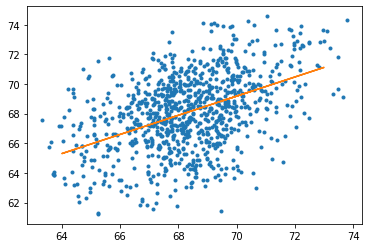

In [58]:
# 0.13.3.2
coefs = np.concatenate((np.expand_dims(galton_data[:, 0], 1), np.ones((galton_data.shape[0], 1))), axis=1)
w1_2, w0_2 = numpy.linalg.lstsq(coefs, galton_data[:, 1])[0]
print(w1_2, w0_2)
plt.plot(galton_data_randn[:,0], galton_data_randn[:,1], '.')
plt.plot(galton_data[:, 0], galton_data[:, 0]*w1_2 + w0_2)
plt.show()